In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [16]:
test = pd.read_csv("./test_data.csv")
train = pd.read_csv("./train_data.csv")

In [17]:
x_train = train.drop("label", axis=1).values
x_test = test.drop("label", axis=1).values

In [18]:
shape = x_train.shape[1]

In [19]:
x_train = x_train.reshape((-1, shape))
x_test = x_test.reshape((-1, shape))

In [20]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [21]:
y_train = train["label"].values
y_test = test["label"].values

In [22]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:

# c. Define the network architecture using Keras
model = Sequential([
    Dense(shape, "relu"),
    Dense(64, "relu"),
    Dense(10, "softmax")
])

In [34]:
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])


In [35]:
M = model.fit(x_train, y_train, batch_size=128, epochs=10)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.4114 - loss: 1.6797
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.4249 - loss: 1.6432
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.4419 - loss: 1.6015
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.4504 - loss: 1.5690
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.4647 - loss: 1.5353
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.4698 - loss: 1.5143
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.4734 - loss: 1.4975
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.4871 - loss: 1.4715
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.4947 - loss: 1.4492
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.5011 - loss: 1.4304


In [36]:
# e. Evaluate the network
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test accuracy:',test_acc)
print('Test Loss:',test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4819 - loss: 1.4759
Test accuracy: 0.475600004196167
Test Loss: 1.4807255268096924


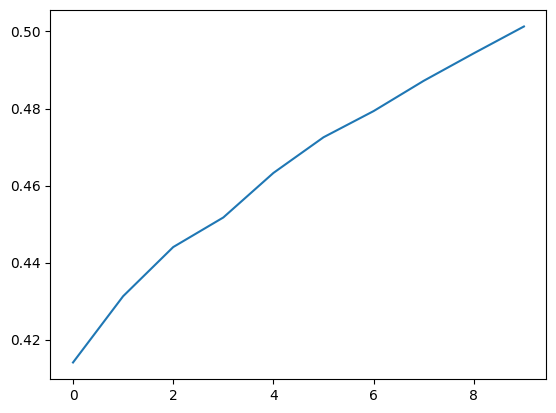

In [37]:
plt.plot(M.history["accuracy"])

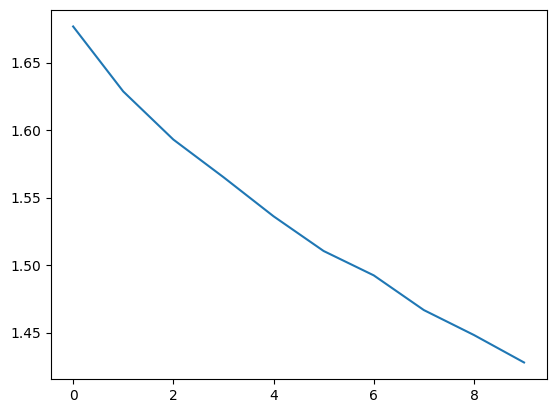

In [38]:
plt.plot(M.history["loss"])


In [39]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
actual:  ship
predicted:  ship


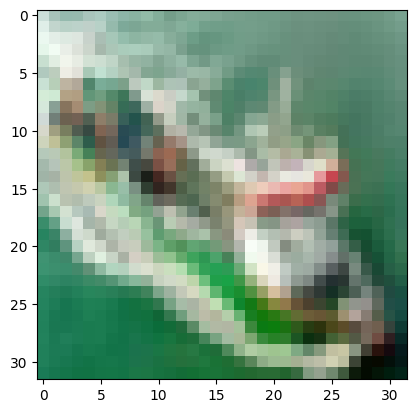

In [40]:
n = 15
plt.imshow(x_test[n].reshape((32,32,3)))

predictions = model.predict(x_test)

print("actual: ", classes[np.argmax(y_test[n])])
print("predicted: ", classes[np.argmax(predictions[n])])